In [1]:
import numpy as np
import pandas as pd 
import torch

In [2]:
df=pd.read_csv('/kaggle/input/cardiovascular-disease-dataset/Cardiovascular_Disease_Dataset/Cardiovascular_Disease_Dataset.csv')
df

,patientid,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target
0,103368,53,1,2,171,0,0,1,147,0,5.3,3,3,1
1,119250,40,1,0,94,229,0,1,115,0,3.7,1,1,0
2,119372,49,1,2,133,142,0,0,202,1,5.0,1,0,0
3,132514,43,1,0,138,295,1,1,153,0,3.2,2,2,1
4,146211,31,1,1,199,0,0,2,136,0,5.3,3,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,9949544,48,1,2,139,349,0,2,183,1,5.6,2,2,1
996,9953423,47,1,3,143,258,1,1,98,1,5.7,1,0,0
997,9965859,69,1,0,156,434,1,0,196,0,1.4,3,1,1
998,9988507,45,1,1,186,417,0,1,117,1,5.9,3,2,1


In [3]:
modes=df.mode().iloc[0] #iloc0 as modes will return muiltiple values in case of a draw
modes

patientid            103368.0
age                      20.0
gender                    1.0
chestpain                 0.0
restingBP               127.0
serumcholestrol           0.0
fastingbloodsugar         0.0
restingrelectro           0.0
maxheartrate            186.0
exerciseangia             0.0
oldpeak                   2.4
slope                     2.0
noofmajorvessels          1.0
target                    1.0
Name: 0, dtype: float64

In [4]:
df=pd.get_dummies(df , columns=["chestpain" , "restingrelectro" , "slope"] , dtype=float) # had to include dtype float as default boolean was throwing objecg error when pytorch was forming tensor
df.columns #note to self, get dummies removes original columns the dummies are created from

Index(['patientid', 'age', 'gender', 'restingBP', 'serumcholestrol',
       'fastingbloodsugar', 'maxheartrate', 'exerciseangia', 'oldpeak',
       'noofmajorvessels', 'target', 'chestpain_0', 'chestpain_1',
       'chestpain_2', 'chestpain_3', 'restingrelectro_0', 'restingrelectro_1',
       'restingrelectro_2', 'slope_0', 'slope_1', 'slope_2', 'slope_3'],
      dtype='object')

In [5]:
from torch import tensor
t_dep=tensor(df.target)

In [8]:
indep_cols = ['age', 'gender', 'restingBP', 'serumcholestrol', 'fastingbloodsugar', 'maxheartrate', 'exerciseangia', 'oldpeak','noofmajorvessels' , 'chestpain_0', 'chestpain_1','chestpain_2', 'chestpain_3', 'restingrelectro_0', 'restingrelectro_1',  'restingrelectro_2', 'slope_0', 'slope_1', 'slope_2', 'slope_3']
t_indep = tensor( df[indep_cols].values , dtype=torch.float)
t_indep

tensor([[ 53.,   1., 171.,  ...,   0.,   0.,   1.],
        [ 40.,   1.,  94.,  ...,   1.,   0.,   0.],
        [ 49.,   1., 133.,  ...,   1.,   0.,   0.],
        ...,
        [ 69.,   1., 156.,  ...,   0.,   0.,   1.],
        [ 45.,   1., 186.,  ...,   0.,   0.,   1.],
        [ 25.,   1., 158.,  ...,   0.,   0.,   0.]])

# Setting up linear model

In [9]:
t_indep.shape

torch.Size([1000, 20])

initialise coefficients

In [10]:
torch.manual_seed(442)

n_coeff = t_indep.shape[1]
coeffs = torch.rand(n_coeff)-0.5
coeffs


tensor([-0.4629,  0.1386,  0.2409, -0.2262, -0.2632, -0.3147,  0.4876,  0.3136,
         0.2799, -0.4392,  0.2103,  0.3625,  0.1722,  0.2324, -0.3575, -0.0010,
        -0.1833, -0.2411,  0.0489,  0.0866])

In [11]:
t_indep*coeffs

tensor([[-24.5337,   0.1386,  41.1940,  ...,  -0.0000,   0.0000,   0.0866],
        [-18.5160,   0.1386,  22.6447,  ...,  -0.2411,   0.0000,   0.0000],
        [-22.6821,   0.1386,  32.0398,  ...,  -0.2411,   0.0000,   0.0000],
        ...,
        [-31.9401,   0.1386,  37.5805,  ...,  -0.0000,   0.0000,   0.0866],
        [-20.8305,   0.1386,  44.8076,  ...,  -0.0000,   0.0000,   0.0866],
        [-11.5725,   0.1386,  38.0623,  ...,  -0.0000,   0.0000,   0.0000]])

In [12]:
vals,indices = t_indep.max(dim=0) #just doing this as the age and other larger variables are dominating, so we're normalising
t_indep = t_indep / vals #pretty cool how this line works

In [13]:
t_indep*coeffs #can see this has stabilised the tensor, no rogue large numbers in other words

tensor([[-0.3067,  0.1386,  0.2060,  ..., -0.0000,  0.0000,  0.0866],
        [-0.2315,  0.1386,  0.1132,  ..., -0.2411,  0.0000,  0.0000],
        [-0.2835,  0.1386,  0.1602,  ..., -0.2411,  0.0000,  0.0000],
        ...,
        [-0.3993,  0.1386,  0.1879,  ..., -0.0000,  0.0000,  0.0866],
        [-0.2604,  0.1386,  0.2240,  ..., -0.0000,  0.0000,  0.0866],
        [-0.1447,  0.1386,  0.1903,  ..., -0.0000,  0.0000,  0.0000]])

In [61]:
preds=(t_indep*coeffs).sum(axis=1) #can also do this with @ (matrix product), i.e t_indep@coeffs is equivalent

In [15]:
preds[:10] #random at this point of course

tensor([ 0.4484, -1.0022,  0.7415, -0.9558,  0.7376,  0.9109,  0.1335, -0.1505,
        -1.2619, -1.0269])

In [16]:
loss=torch.abs(preds-t_dep).mean()
loss

tensor(0.6840)

In [17]:
#functionising 
def calc_preds(coeffs, indeps): return (indeps*coeffs).sum(axis=1)
def calc_loss(coeffs, indeps, deps): return torch.abs(calc_preds(coeffs, indeps)-deps).mean()



# Gradient Descent Step

In [18]:
coeffs.requires_grad_()

tensor([-0.4629,  0.1386,  0.2409, -0.2262, -0.2632, -0.3147,  0.4876,  0.3136,
         0.2799, -0.4392,  0.2103,  0.3625,  0.1722,  0.2324, -0.3575, -0.0010,
        -0.1833, -0.2411,  0.0489,  0.0866], requires_grad=True)

In [19]:
loss = calc_loss(coeffs, t_indep, t_dep)
loss

tensor(0.6840, grad_fn=<MeanBackward0>)

In [20]:
loss.backward()

In [21]:
coeffs.grad

tensor([-0.4781, -0.5270, -0.5661, -0.3922, -0.2780, -0.5415, -0.2860, -0.2912,
        -0.3207, -0.3500, -0.1260, -0.2180, -0.0360, -0.2160, -0.3260, -0.1880,
        -0.0920, -0.1950, -0.2740, -0.1690])

In [22]:
loss = calc_loss(coeffs, t_indep, t_dep)
loss.backward()
with torch.no_grad():
    coeffs.sub_(coeffs.grad * 0.1)  # remembering in pytorch an method ending in _ does the operation in-place
    coeffs.grad.zero_()
    print(calc_loss(coeffs, t_indep, t_dep))

tensor(0.4519)


# Create Validation and Train

In [24]:
from fastai.data.transforms import RandomSplitter
trn_split,val_split=RandomSplitter(seed=42)(df)
val_split


(#200) [542,618,816,68,94,215,60,585,942,165...]

In [25]:
trn_indep,val_indep = t_indep[trn_split],t_indep[val_split]
trn_dep,val_dep = t_dep[trn_split],t_dep[val_split]
len(trn_indep),len(val_indep)

(800, 200)

In [27]:
#functionising the gradient descent step
def update_coeffs(coeffs, lr):
    coeffs.sub_(coeffs.grad * lr)
    coeffs.grad.zero_()
    
def one_epoch(coeffs, lr):
    loss = calc_loss(coeffs, trn_indep, trn_dep)
    loss.backward()
    with torch.no_grad(): update_coeffs(coeffs, lr)
    print(f"{loss:.3f}", end="; ")
    
def init_coeffs(): return (torch.rand(n_coeff)-0.5).requires_grad_()


In [28]:
def train_model(epochs=30, lr=0.01):
    torch.manual_seed(442)
    coeffs = init_coeffs()
    for i in range(epochs): one_epoch(coeffs, lr=lr)
    return coeffs

In [37]:
coeffs = train_model(18 , lr=0.1)

0.675; 0.519; 0.466; 0.440; 0.423; 0.409; 0.395; 0.382; 0.370; 0.358; 0.347; 0.336; 0.326; 0.316; 0.306; 0.296; 0.287; 0.279; 

In [38]:
def show_coeffs(): return dict(zip(indep_cols, coeffs.requires_grad_(False)))
show_coeffs()

{'age': tensor(-0.2787),
 'gender': tensor(0.1418),
 'restingBP': tensor(0.4288),
 'serumcholestrol': tensor(-0.0782),
 'fastingbloodsugar': tensor(-0.0705),
 'maxheartrate': tensor(-0.1398),
 'exerciseangia': tensor(0.2311),
 'oldpeak': tensor(0.2712),
 'noofmajorvessels': tensor(0.3231),
 'chestpain_0': tensor(-0.2189),
 'chestpain_1': tensor(0.1923),
 'chestpain_2': tensor(0.3355),
 'chestpain_3': tensor(0.2044),
 'restingrelectro_0': tensor(0.0592),
 'restingrelectro_1': tensor(-0.0723),
 'restingrelectro_2': tensor(0.0945),
 'slope_0': tensor(-0.2023),
 'slope_1': tensor(-0.2113),
 'slope_2': tensor(0.1957),
 'slope_3': tensor(0.1366)}

In [49]:
preds = calc_preds(coeffs, val_indep)
preds[:10]

tensor([-0.1802,  0.3475,  0.0530,  0.8645,  1.3014,  1.0423,  1.1463,  0.3844,
         0.8922, -0.1490])

In [43]:
results = val_dep.bool()==(preds>0.5) #some of these still negative or greatr than 1, need to sort later I imagine
results[:16]

tensor([ True, False,  True,  True,  True,  True,  True, False,  True,  True,
         True,  True,  True, False,  True,  True])

In [41]:
results.float().mean()


tensor(0.8700)

In [42]:
def acc(coeffs): return (val_dep.bool()==(calc_preds(coeffs, val_indep)>0.5)).float().mean()
acc(coeffs)


tensor(0.8700)

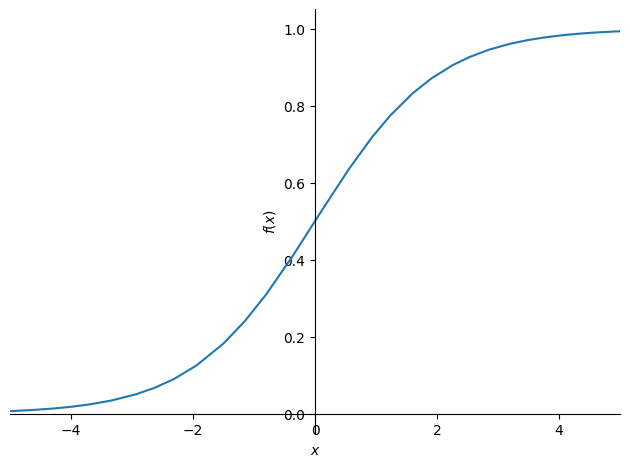

In [48]:
import sympy #god i love sympy
sympy.plot("1/(1+exp(-x))", xlim=(-5,5));


A quick modification of calc_preds will allow us to use sigmoid to help with problems in the preds as seen above

In [50]:
def calc_preds(coeffs, indeps): return torch.sigmoid((indeps*coeffs).sum(axis=1))


In [59]:
coeffs = train_model(1000, lr=0.05)

0.439; 0.437; 0.436; 0.434; 0.433; 0.431; 0.429; 0.428; 0.426; 0.425; 0.423; 0.422; 0.420; 0.419; 0.418; 0.416; 0.415; 0.413; 0.412; 0.410; 0.409; 0.408; 0.406; 0.405; 0.404; 0.402; 0.401; 0.400; 0.398; 0.397; 0.396; 0.395; 0.393; 0.392; 0.391; 0.390; 0.389; 0.387; 0.386; 0.385; 0.384; 0.383; 0.382; 0.380; 0.379; 0.378; 0.377; 0.376; 0.375; 0.374; 0.373; 0.372; 0.371; 0.370; 0.369; 0.368; 0.367; 0.366; 0.365; 0.364; 0.363; 0.362; 0.361; 0.360; 0.359; 0.358; 0.357; 0.356; 0.355; 0.355; 0.354; 0.353; 0.352; 0.351; 0.350; 0.349; 0.349; 0.348; 0.347; 0.346; 0.345; 0.344; 0.344; 0.343; 0.342; 0.341; 0.340; 0.340; 0.339; 0.338; 0.337; 0.337; 0.336; 0.335; 0.334; 0.334; 0.333; 0.332; 0.331; 0.331; 0.330; 0.329; 0.328; 0.328; 0.327; 0.326; 0.326; 0.325; 0.324; 0.324; 0.323; 0.322; 0.322; 0.321; 0.320; 0.320; 0.319; 0.318; 0.318; 0.317; 0.316; 0.316; 0.315; 0.314; 0.314; 0.313; 0.313; 0.312; 0.311; 0.311; 0.310; 0.309; 0.309; 0.308; 0.308; 0.307; 0.306; 0.306; 0.305; 0.305; 0.304; 0.303; 0.303;

In [60]:
acc(coeffs) 

tensor(0.9350)

linear regression from scratch, Voila. This will be built on in next project to turn it into a neural net and then a deep learning model by adding a hidden layer and then n hidden layers respectivley. 
